In [1]:
#%% Imports
import numpy as np
import matplotlib.pyplot as plt
import json
import skimage.io

import annotation

In [2]:
# Paths
annotation_json = '/media/mha114/MassimalDataProcessing/20210418_Juvika/Annotation/20210418_Juvika_Transects_V3/label_classes.json'
annotation_image = '/media/mha114/MassimalDataProcessing/20210418_Juvika/Annotation/20210418_Juvika_Transects_V3/transect1_15mAGL_rgb.png'

In [3]:
# Read annotation metadata
class_dict = annotation.read_hasty_metadata(annotation_json)

In [4]:
# Read annotation mask
class_mask = skimage.io.imread(annotation_image)

In [5]:
# Show all classes
for name, ind in class_dict.items():
    print(name + ': ' + str(ind))

Seagrass-0-25%-density: 1
Seagrass-25-50%-density: 2
Fucus-vesiculosus: 3
Ascophyllum-nodosum: 4
Sand: 5
White-rope: 6
Bamboo-stick: 7
Blue-marker: 8
Yellow-marker: 9
Gray-reference: 10
Black-reference: 11
Shadow: 12


In [6]:
classes_to_merge = [['Seagrass-0-25%-density', 'Seagrass-25-50%-density'],
                    ['Blue-marker','Yellow-marker','White-rope','Bamboo-stick'],
                    ['Gray-reference','Black-reference']]
merged_class_names = ['Seagrass',
                      'Marker',
                      'Reference']
merged_class_dict, merged_class_mask = annotation.merge_classes(class_dict,class_mask,classes_to_merge,merged_class_names)

In [7]:
merged_class_dict

{'Seagrass': 1,
 'Marker': 2,
 'Reference': 3,
 'Fucus-vesiculosus': 4,
 'Ascophyllum-nodosum': 5,
 'Sand': 6,
 'Shadow': 7}

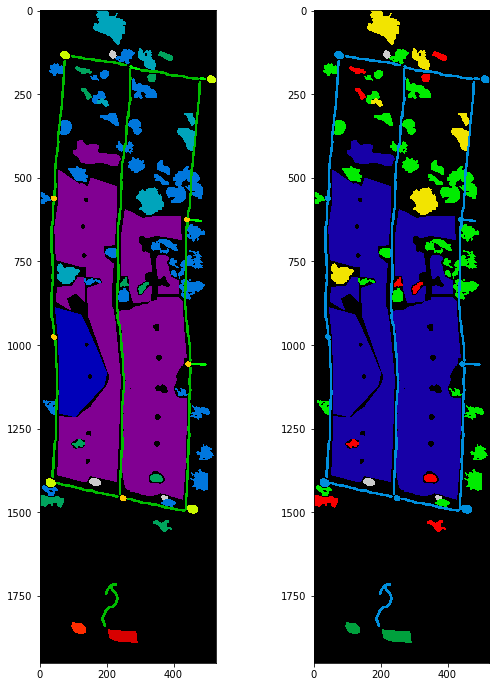

In [8]:
# Show original and subset annotation mask
fig,ax = plt.subplots(ncols=2,figsize=(9,12))
ax[0].imshow(class_mask,interpolation='none',cmap='nipy_spectral')
ax[1].imshow(merged_class_mask,interpolation='none',cmap='nipy_spectral')
plt.show()